**Context**

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

**Content**

price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

Import

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rifaifirdaus/UTS_Praktikum_Penambangan_Data/refs/heads/main/diamonds.csv', delimiter = ",")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


EDA

In [6]:
df.shape
print("Data shape:", df.shape)

Data shape: (53940, 11)


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None


In [8]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [9]:
#untuk melihat statistical details
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
print(df.columns)

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


In [11]:
print(df['price'].value_counts())

price
605     132
802     127
625     126
828     125
776     124
       ... 
2769      1
9033      1
9027      1
9026      1
9025      1
Name: count, Length: 11602, dtype: int64


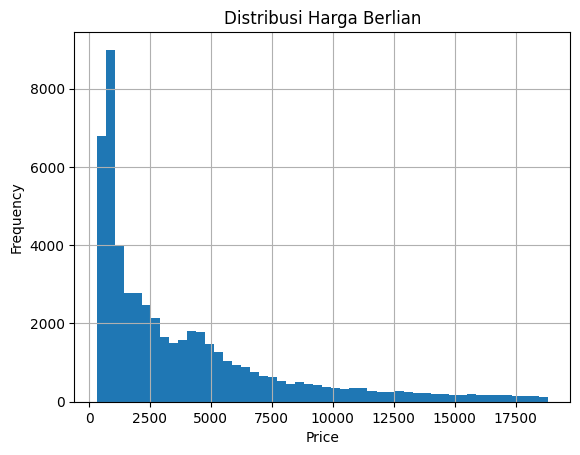

In [12]:
df['price'].hist(bins=50)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribusi Harga Berlian")
plt.show()

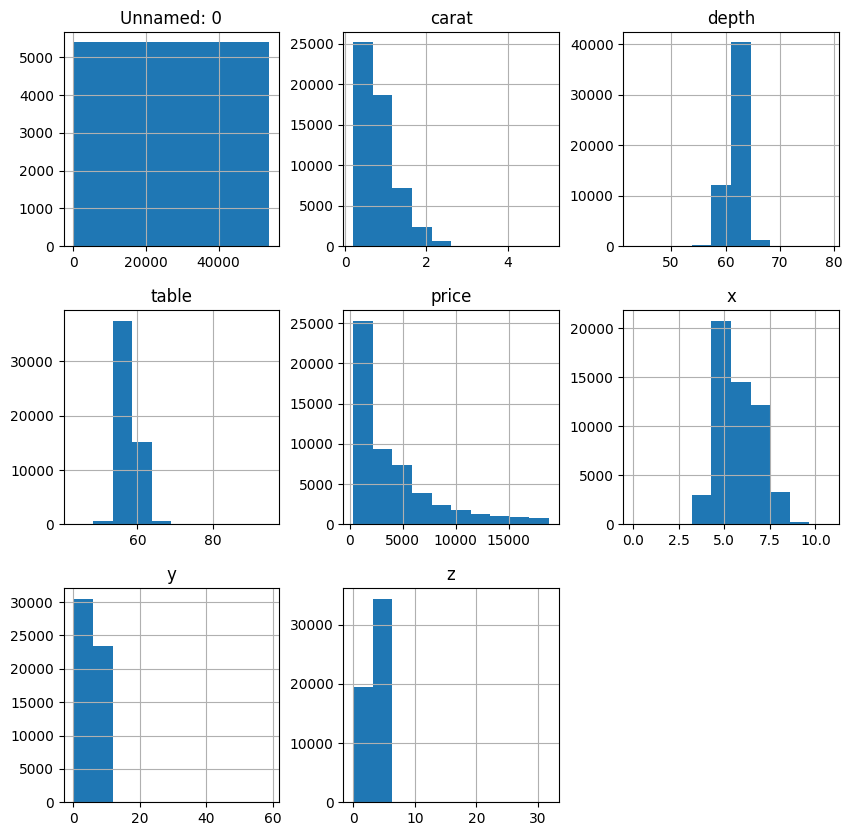

In [13]:
import matplotlib.pyplot as plt
# check histogram for continuous columns
df.hist(figsize=(10,10))
plt.show()

In [14]:
#check correlation coef
df.corr(numeric_only = True)

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [15]:
df.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [16]:
df.info()
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB




##Data Preprocessing

Data cleaning

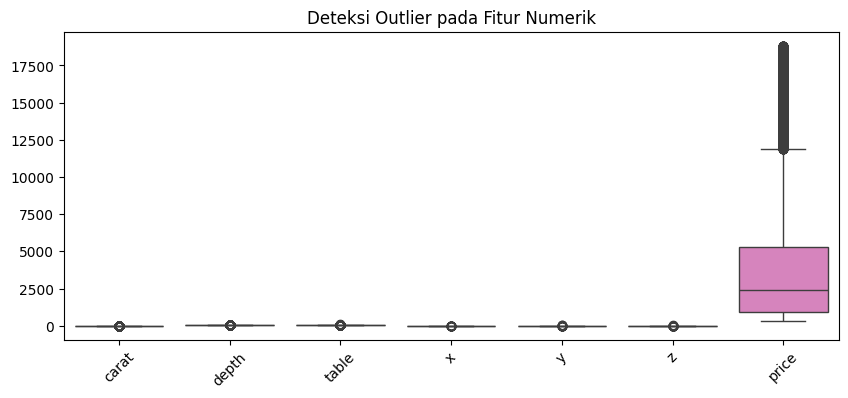

In [17]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']])
plt.title("Deteksi Outlier pada Fitur Numerik")
plt.xticks(rotation=45)
plt.show()

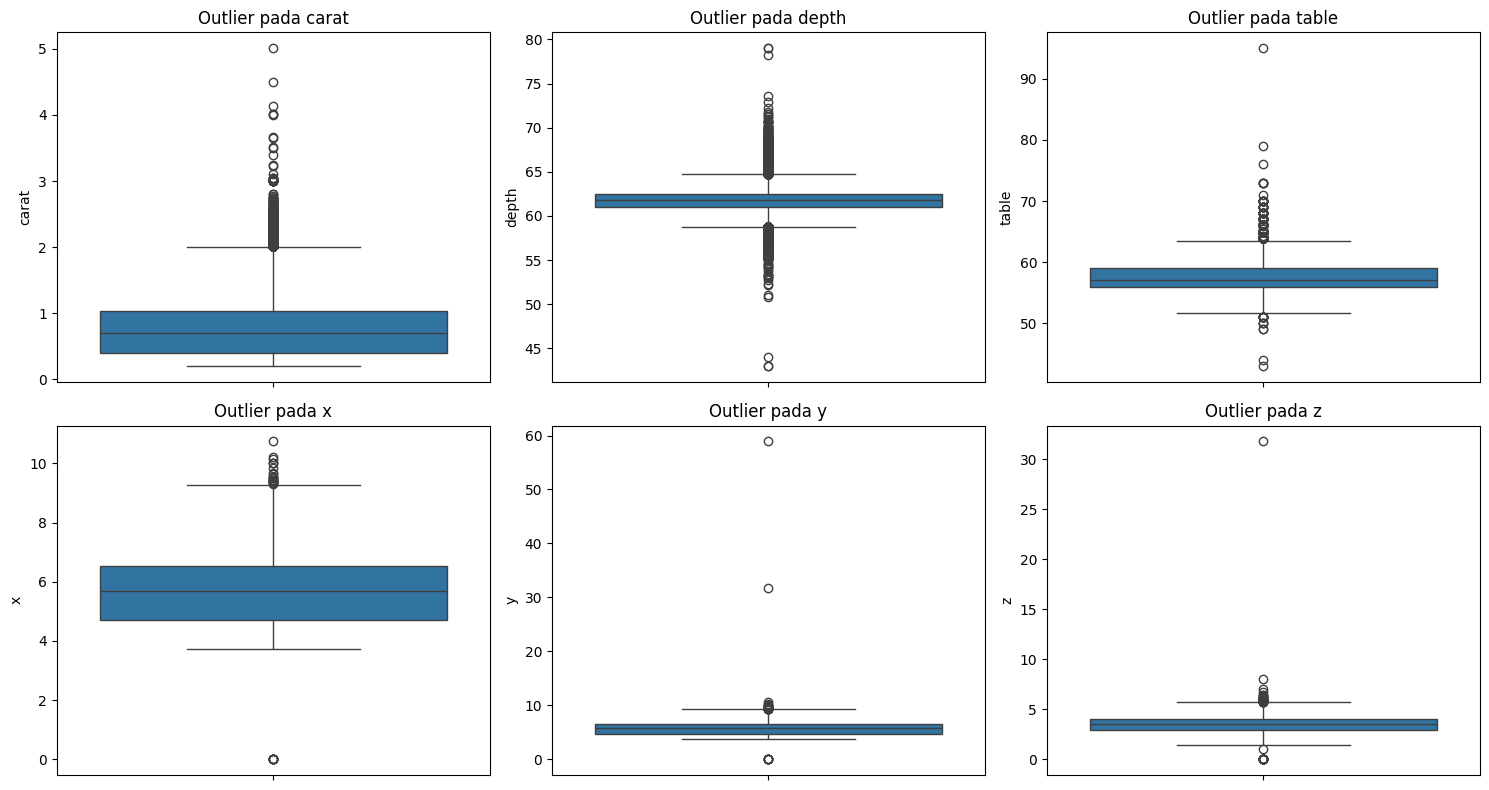

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
numeric_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Outlier pada {col}')
plt.tight_layout()
plt.show()


In [19]:
df_cleaned = (
    df.drop(df[(df[['x', 'y', 'z']] == 0).any(axis=1)].index)
      .drop(columns=['Unnamed: 0'])
      .drop_duplicates()
)
print("Data setelah dibersihkan:", df_cleaned.shape)

Data setelah dibersihkan: (53775, 10)


Encoding

In [20]:
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['cut', 'color', 'clarity'], dtype='object')


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_encoded = df_cleaned.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

print("\nData setelah encoding:")
df_encoded.head()


Data setelah encoding:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


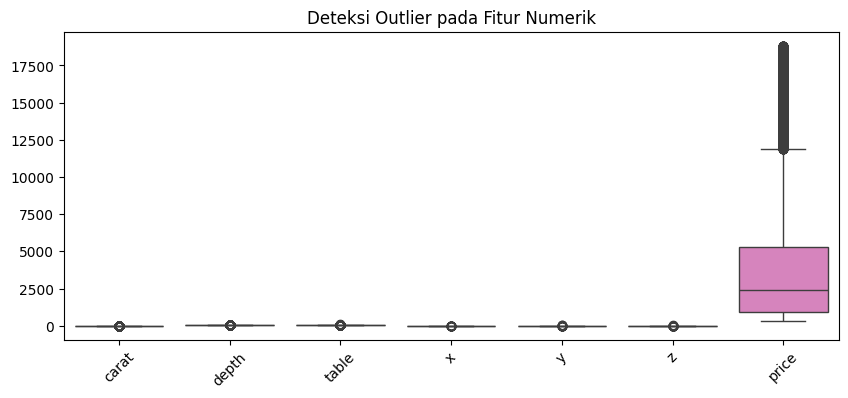

In [22]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']])
plt.title("Deteksi Outlier pada Fitur Numerik")
plt.xticks(rotation=45)
plt.show()

Scaler

In [23]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

scaler = RobustScaler()

scaled_array = scaler.fit_transform(df_encoded)

df_scaled = pd.DataFrame(scaled_array, columns=df_encoded.columns)

print("\nData setelah scaling:")
df_scaled


Data setelah scaling:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,-0.734375,0.0,-0.666667,-0.333333,-0.200000,-0.666667,-0.474503,-0.956284,-0.950549,-0.982143
1,-0.765625,1.0,-0.666667,-0.666667,-1.333333,1.333333,-0.474503,-0.989071,-1.027473,-1.089286
2,-0.734375,-1.0,-0.666667,0.000000,-3.266667,2.666667,-0.474274,-0.901639,-0.901099,-1.089286
3,-0.640625,1.0,0.666667,0.333333,0.400000,0.333333,-0.472673,-0.819672,-0.813187,-0.803571
4,-0.609375,-1.0,1.000000,-0.333333,1.000000,0.333333,-0.472445,-0.743169,-0.747253,-0.696429
...,...,...,...,...,...,...,...,...,...,...
53770,0.031250,0.0,-1.000000,-0.666667,-0.666667,0.000000,0.081409,0.027322,0.027473,-0.026786
53771,0.031250,-1.0,-1.000000,-0.666667,0.866667,-0.666667,0.081409,-0.005464,0.021978,0.071429
53772,0.000000,2.0,-1.000000,-0.666667,0.666667,1.000000,0.081409,-0.021858,-0.016484,0.026786
53773,0.250000,1.0,0.333333,-0.333333,-0.533333,0.333333,0.081409,0.245902,0.225275,0.187500


Feature Engineering

In [24]:
df_scaled.corr()['price'].sort_values(ascending=False)

,price
price,1.000000
carat,0.921548
x,0.887137
z,0.868030
y,0.867685
color,0.171746
table,0.126666
cut,0.040237
depth,-0.011144
clarity,-0.071248


In [25]:
df_final = df_scaled.copy()

df_final['volume'] = df_final['x'] * df_final['y'] * df_final['z']
df_final = df_final.drop(columns=['x','y','z','depth'])

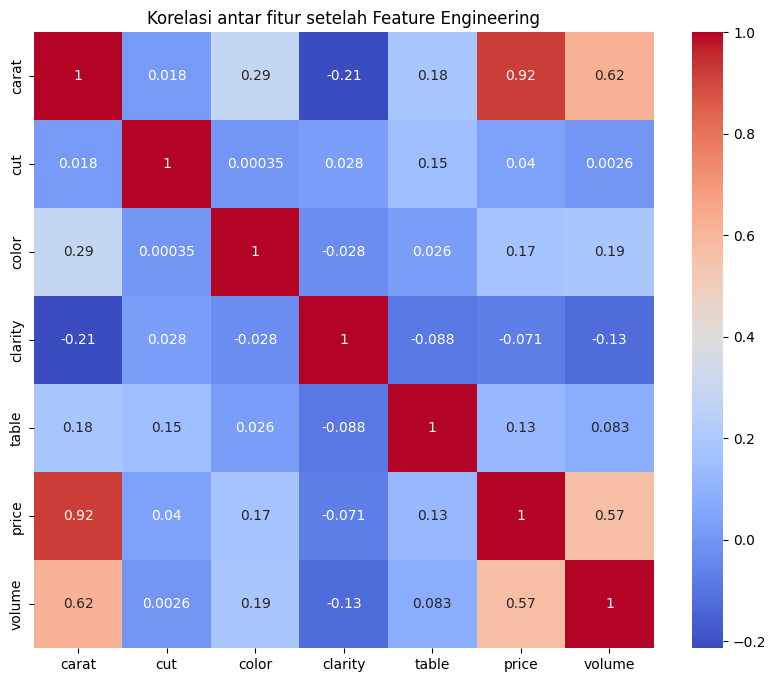

Korelasi terhadap harga (price):


,price
price,1.000000
carat,0.921548
volume,0.569222
color,0.171746
table,0.126666
cut,0.040237
clarity,-0.071248


In [26]:
corr = df_final.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Korelasi antar fitur setelah Feature Engineering")
plt.show()

corr_price = corr['price'].sort_values(ascending=False)
print("Korelasi terhadap harga (price):")
corr_price

Train Test Split

In [27]:
X = df_final.drop(columns=['price'])
y = df_final['price']

In [28]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Model

Linear Regression

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

# prediksi
y_pred = model.predict(X_test)

In [30]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

MSE : 0.10013393815138225
RMSE: 0.3164394699644503
R²  : 0.8788302210481675


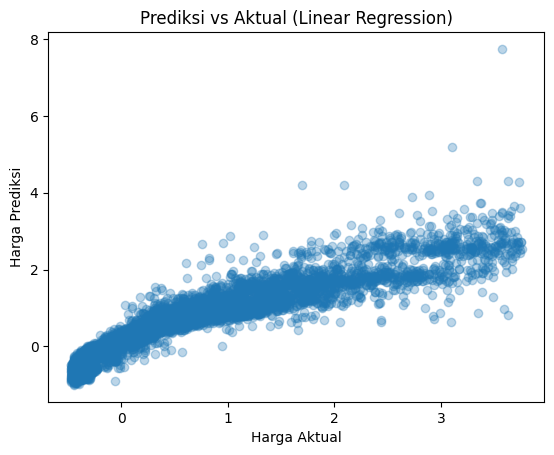

In [31]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Prediksi vs Aktual (Linear Regression)")
plt.show()

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression")
print("MSE :", mse_rf)
print("RMSE:", rmse_rf)
print("R²  :", r2_rf)


Random Forest Regression
MSE : 0.0160050148443869
RMSE: 0.12651092776668305
R²  : 0.980632699096651


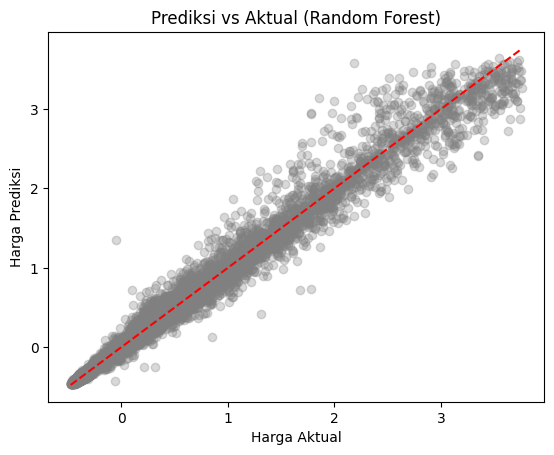

In [33]:
plt.scatter(y_test, y_pred_rf, alpha=0.3, color='gray')
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Prediksi vs Aktual (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [34]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(n_estimators=200, random_state=42, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regression")
print("MSE :", mse_xgb)
print("RMSE:", rmse_xgb)
print("R²  :", r2_xgb)

XGBoost Regression
MSE : 0.016192500263217273
RMSE: 0.12724975545444978
R²  : 0.9804058272969818


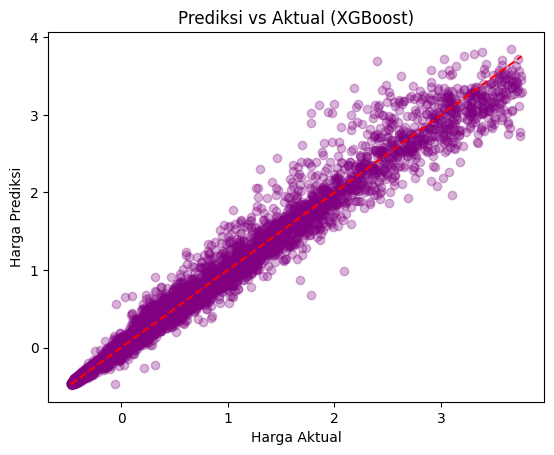

In [35]:
plt.scatter(y_test, y_pred_xgb, alpha=0.3, color='purple')
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Prediksi vs Aktual (XGBoost)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [36]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_reg.fit(X_train, y_train)

y_pred_dt = dt_reg.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print("MSE:", mse_dt)
print("RMSE:", rmse_dt)
print("R²:", r2_dt)

Decision Tree Results:
MSE: 0.020701361754078405
RMSE: 0.14387967804411575
R²: 0.9749497575542126


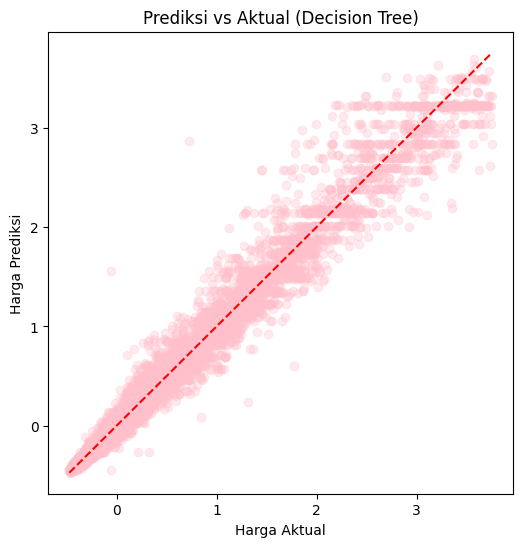

In [37]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_dt, alpha=0.3, color='pink')
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Prediksi vs Aktual (Decision Tree)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # garis ideal
plt.show()

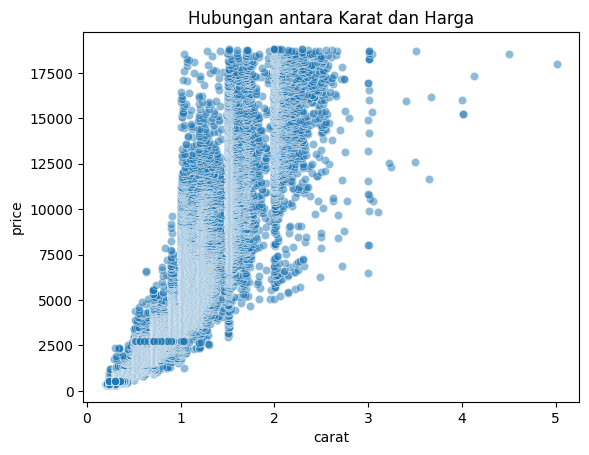

In [38]:
sns.scatterplot(x='carat', y='price', data=df_cleaned, alpha=0.5)
plt.title('Hubungan antara Karat dan Harga')
plt.show()

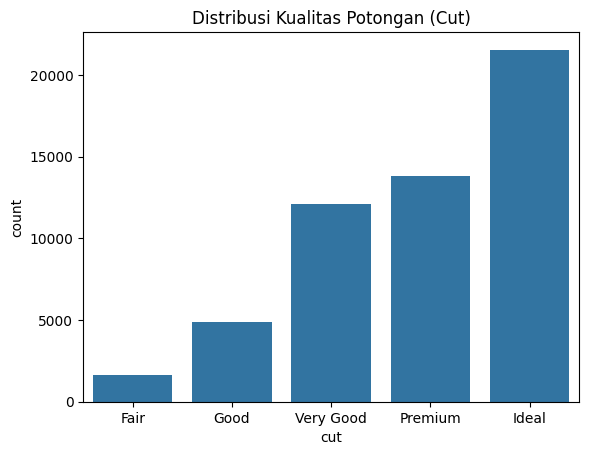

In [39]:
sns.countplot(x='cut', data=df, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title('Distribusi Kualitas Potongan (Cut)')
plt.show()

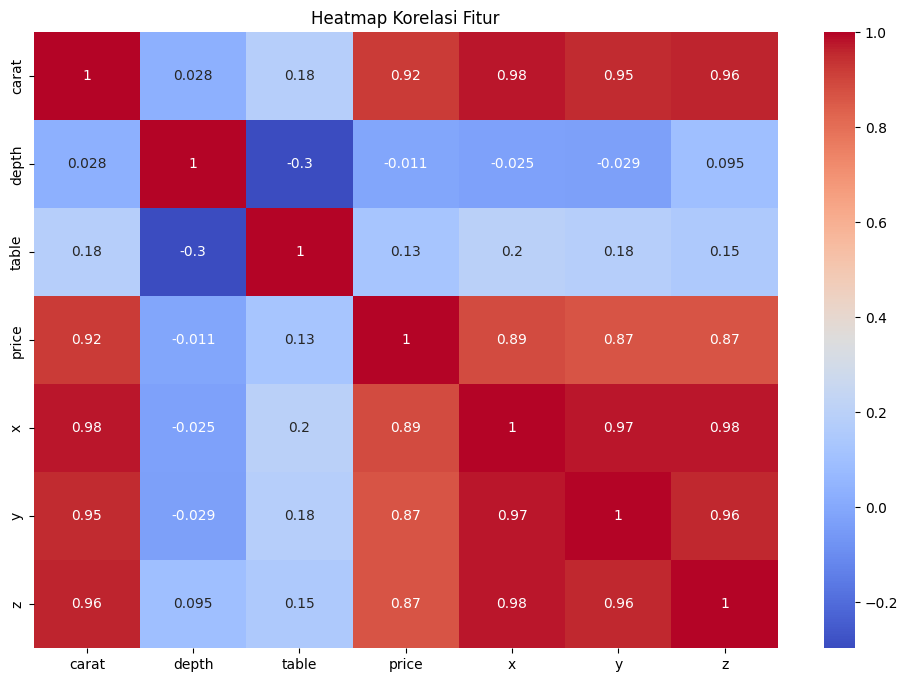

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()

In [41]:
# Calculate MAE for each model
mae_linear = mean_absolute_error(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Buat dictionary untuk menyimpan hasil
results = {
    "Linear Regression": {'MAE': mae_linear, 'R-squared': r2},
    "Random Forest": {'MAE': mae_rf, 'R-squared': r2_rf},
    "XGBoost": {'MAE': mae_xgb, 'R-squared': r2_xgb},
    "Decision Tree": {'MAE': mae_dt, 'R-squared': r2_dt}
}

# Ubah menjadi DataFrame
results_df = pd.DataFrame(results).T.sort_values(by='R-squared', ascending=False)
print("\n===== Tabel Perbandingan Performa Model =====")
print(results_df)

best_model = results_df.index[0]
print(f"\nModel terbaik adalah: {best_model}")


===== Tabel Perbandingan Performa Model =====
                        MAE  R-squared
Random Forest      0.066103   0.980633
XGBoost            0.066083   0.980406
Decision Tree      0.077943   0.974950
Linear Regression  0.213132   0.878830

Model terbaik adalah: Random Forest


In [42]:
import joblib
import os

feature_columns = list(X.columns)

os.makedirs("saved_model", exist_ok=True)

joblib.dump(rf, "saved_model/model.pkl")
joblib.dump(feature_columns, "saved_model/features.pkl")

print("Random Forest saved!")

Random Forest saved!


In [45]:
!zip -r saved_model.zip saved_model

  adding: saved_model/ (stored 0%)
  adding: saved_model/model.pkl (deflated 78%)
  adding: saved_model/features.pkl (deflated 8%)


In [46]:
from google.colab import files
files.download("saved_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>